# Testing Performance of AerialWaste Model

In [1]:
import sys

sys.path.append("/kaggle/input/aerial-waste-model")
sys.path.append("/kaggle/input/weights-aerial-waste-model")

In [2]:
import json
import os
import torch
import time
import gc
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.image_processor import ImageProcessor

In [3]:
# # Step 1: Set up paths
# TEST_JSON_PATH = r"/kaggle/input/aerialwaste-dataset/12607190/testing.json"
# TEST_IMAGE_FOLDER = r"/kaggle/input/aerialwaste-dataset/12607190/images/"
# STATE_DICT_PATH = r"/kaggle/input/weights-aerial-waste-model/weights/checkpoint.pth"

# # Step 2: Define categories to detect suspicious sites
# CATS = ["suspicious_site"]
# model = 'architecture.resnet50_fpn'

# # Step 3: Load the Image Processor
# ip = ImageProcessor(CATS, STATE_DICT_PATH, model=model)
# print("Model loaded successfully.")

# # Step 4: Check if GPU is available
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using device: {device}")

# # Step 5: Load test dataset
# with open(TEST_JSON_PATH, 'r') as f:
#     test_data = json.load(f)

# # Step 6: Extract test images
# test_images = test_data.get("images", [])
# print(f"Found {len(test_images)} test images.")

# # Step 7: Run predictions in Batches
# batch_size = 50  # Adjust if OOM persists
# num_batches = (len(test_images) + batch_size - 1) // batch_size

# output_json_path = "/kaggle/working/test_predictions.json"

# for i in tqdm(range(0, len(test_images), batch_size), desc="Processing Batches"):
#     batch = test_images[i:i+batch_size]

#     results = []
#     for image_data in tqdm(batch, desc=f"Processing Batch {i//batch_size + 1}/{num_batches}", leave=False):
#         img_path = os.path.join(TEST_IMAGE_FOLDER, image_data["file_name"])
#         if not os.path.exists(img_path):
#             print(f"Warning: Image {img_path} not found. Skipping.")
#             continue

#         start_time = time.time()

#         with torch.no_grad():  # Fix 1: Prevents storing unnecessary computation graphs
#             iw = ip.execute_cams_pred(img_path)

#         elapsed_time = time.time() - start_time
#         print(f"Processed {image_data['file_name']} in {elapsed_time:.2f} sec")

#         results.append({
#             "image_id": image_data["id"],
#             "file_name": image_data["file_name"],
#             "classification_scores": float(iw.classification_scores[0]),
#             "predicted_categories": list(iw.predicted_categories.keys())[0] if iw.predicted_categories else 0
#         })

#     # Fix 5: Save results after every batch (instead of storing all in memory)
#     with open(output_json_path, 'a') as f:
#         for result in results:
#             json.dump(result, f)
#             f.write("\n")

#     # Fix 2: Free GPU and CPU memory after each batch
#     torch.cuda.empty_cache()
#     gc.collect()

# print(f"✅ Predictions saved at {output_json_path}")

In [4]:
# # Step 1: Create an empty list to store data
# data = []

# # Step 2: Loop through predictions and add necessary columns
# for image_data, prediction in zip(test_images, results):
#     img_id = image_data["id"]
#     file_name = image_data["file_name"]
#     true_class = image_data["is_candidate_location"]  # Ground truth
#     classification_score = prediction["classification_scores"]  # Extract score
#     predicted_category = prediction["predicted_categories"]  # Extract category

#     # Assign predicted class: 1 if 'suspicious_site', else 0
#     predicted_class = 1 if predicted_category == "suspicious_site" else 0

#     # Append to data list
#     data.append({
#         "image_id": img_id,
#         "file_name": file_name,
#         "classification_score": classification_score,
#         "predicted_class": predicted_class,
#         "true_class": true_class
#     })

# # Step 3: Convert to DataFrame
# df = pd.DataFrame(data)

# # Step 4: Save to CSV (optional)
# df.to_csv("/kaggle/working/model_predictions.csv", index=False)
# df

In [5]:
# incorrect_images = df[df["predicted_class"] != df["true_class"]]
# print(f"Found {len(incorrect_images)} incorrectly classified images.")

# for _, row in incorrect_images.iterrows():
#     img_path = os.path.join(TEST_IMAGE_FOLDER, row["file_name"])
#     print(f"Analyzing {row['file_name']}...")
#     iw = ip.execute_cams_pred(img_path)
#     print(iw.classification_scores, iw.predicted_categories)
#     iw.show_global_cams()


In [6]:
# from sklearn.metrics import classification_report, accuracy_score, f1_score

# # Extract true and predicted labels
# y_true = df["true_class"]
# y_pred = df["predicted_class"]

# # Compute accuracy
# accuracy = accuracy_score(y_true, y_pred)

# # Compute F1-score
# f1 = f1_score(y_true, y_pred)

# # Generate classification report
# report = classification_report(y_true, y_pred, target_names=["Negative (0)", "Positive (1)"])

# # Display results
# print(f"✅ Accuracy: {accuracy:.4f}")
# print(f"✅ F1 Score: {f1:.4f}")
# print("\nClassification Report:\n", report)

In [7]:
# # Compute classification report as a dictionary
# report_dict = classification_report(y_true, y_pred, target_names=["Negative (0)", "Positive (1)"], output_dict=True)

# # Convert to DataFrame
# report_df = pd.DataFrame(report_dict).transpose()

# # Save to CSV
# report_csv_path = "/kaggle/working/classification_report.csv"
# report_df.to_csv(report_csv_path, index=True)
# report_df

# With uploaded predictions

In [8]:
# Step 1: Set up paths
TEST_JSON_PATH = r"/kaggle/input/aerialwaste-dataset/12607190/testing.json"
TEST_IMAGE_FOLDER = r"/kaggle/input/aerialwaste-dataset/12607190/images/"
STATE_DICT_PATH = r"/kaggle/input/weights-aerial-waste-model/weights/checkpoint.pth"

# Step 2: Define categories to detect suspicious sites
CATS = ["suspicious_site"]
model = 'architecture.resnet50_fpn'

# Step 3: Load the Image Processor
ip = ImageProcessor(CATS, STATE_DICT_PATH, model=model)
print("Model loaded successfully.")

# Step 4: Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Step 5: Load test dataset
with open(TEST_JSON_PATH, 'r') as f:
    test_data = json.load(f)

# Step 6: Extract test images
test_images = test_data.get("images", [])
print(f"Found {len(test_images)} test images.")

Model loaded successfully.
Using device: cuda
Found 2607 test images.


In [9]:
with open("/kaggle/input/test-predictions/test_predictions.json", "r") as file:
    dic = [json.loads(line) for line in file]

df = pd.DataFrame(dic)
df["predicted_class"] = df["classification_scores"].apply(
    lambda x: 1 if x >= 0.44 else 0
)
df.drop(columns=["predicted_categories"], inplace=True)
df

image_id  file_name  classification_scores  predicted_class
0           13     13.png           6.776331e-01                1
1           15     15.png           2.463700e-01                0
2           16     16.png           6.776331e-01                1
3           17     17.png           6.776331e-01                1
4           21     21.png           6.776331e-01                1
...        ...        ...                    ...              ...
2602     11696  11696.png           1.301220e-07                0
2603     11697  11697.png           6.064392e-02                0
2604     11700  11700.png           3.604656e-07                0
2605     11701  11701.png           2.979757e-07                0
2606     11702  11702.png           4.626772e-06                0

[2607 rows x 4 columns]

In [10]:
# Convert list of dictionaries to DataFrame
true_class_df = pd.DataFrame(test_images)

# Rename column 'id' to 'image_id' to match df
true_class_df.rename(columns={"id": "image_id", "is_candidate_location": "true_class"}, inplace=True)

# Merge the two DataFrames on 'image_id'
df = df.merge(true_class_df[["image_id", "true_class", "severity", "evidence", "site_type", "categories"]], on="image_id", how="left")

In [11]:
categories = test_data["categories"]

In [12]:
# Create a dictionary mapping ID -> Name
category_mapping = {cat["id"]: cat["name"] for cat in categories}

# Function to replace IDs with Names
def replace_category_ids(id_list):
    return [category_mapping.get(cat_id, "Unknown") for cat_id in id_list]

# Apply transformation
df["categories"] = df["categories"].apply(replace_category_ids)
df

image_id  file_name  classification_scores  predicted_class  true_class  \
0           13     13.png           6.776331e-01                1           1   
1           15     15.png           2.463700e-01                0           0   
2           16     16.png           6.776331e-01                1           1   
3           17     17.png           6.776331e-01                1           1   
4           21     21.png           6.776331e-01                1           1   
...        ...        ...                    ...              ...         ...   
2602     11696  11696.png           1.301220e-07                0           0   
2603     11697  11697.png           6.064392e-02                0           0   
2604     11700  11700.png           3.604656e-07                0           0   
2605     11701  11701.png           2.979757e-07                0           0   
2606     11702  11702.png           4.626772e-06                0           0   

     severity evidence                    site_type categories  
0           1        1              Production site         []  
1           1        1  Agricultural area/farm area         []  
2           1        2      Non production building         []  
3           2        1              Production site         []  
4           1        1  Agricultural area/farm area         []  
...       ...      ...                          ...        ...  
2602      n/a      n/a                          n/a         []  
2603      n/a      n/a                          n/a         []  
2604      n/a      n/a                          n/a         []  
2605      n/a      n/a                          n/a         []  
2606      n/a      n/a                          n/a         []  

[2607 rows x 9 columns]

In [13]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Extract true and predicted labels
y_true = df["true_class"]
y_pred = df["predicted_class"]

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

# Compute F1-score
f1 = f1_score(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=["Negative (0)", "Positive (1)"])

# Display results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

✅ Accuracy: 0.9152
✅ F1 Score: 0.8806

Classification Report:
               precision    recall  f1-score   support

Negative (0)       0.97      0.90      0.93      1738
Positive (1)       0.83      0.94      0.88       869

    accuracy                           0.92      2607
   macro avg       0.90      0.92      0.91      2607
weighted avg       0.92      0.92      0.92      2607



In [14]:
# False Positives: Predicted 1, but actually 0
false_pos = df[(df["predicted_class"] == 1) & (df["true_class"] == 0)]
false_pos.to_csv("/kaggle/working/false_pos.csv")

# False Negatives: Predicted 0, but actually 1
false_neg = df[(df["predicted_class"] == 0) & (df["true_class"] == 1)]
false_neg.to_csv("/kaggle/working/false_neg.csv")

# Print results
print(f"Found {len(false_pos + false_neg)} incorrectly classified images.")
print(f"False Positives: {len(false_pos)}")
print(f"False Negatives: {len(false_neg)}")

Found 221 incorrectly classified images.
False Positives: 167
False Negatives: 54


In [15]:
false_pos

image_id  file_name  classification_scores  predicted_class  true_class  \
13          54     54.png               0.625226                1           0   
42         186    186.png               0.601373                1           0   
50         230    230.png               0.677633                1           0   
64         282    282.png               0.677633                1           0   
65         285    285.png               0.677633                1           0   
...        ...        ...                    ...              ...         ...   
2540     11463  11463.png               0.677633                1           0   
2542     11466  11466.png               0.677633                1           0   
2547     11475  11475.png               0.647726                1           0   
2578     11592  11592.png               0.677633                1           0   
2579     11596  11596.png               0.677633                1           0   

     severity evidence                    site_type categories  
13          2        2                Degraded area         []  
42          1        3              Production site         []  
50          2        1               Abandoned area         []  
64          1        1              Production site         []  
65          1        1  Agricultural area/farm area         []  
...       ...      ...                          ...        ...  
2540      n/a      n/a                          n/a         []  
2542      n/a      n/a                          n/a         []  
2547      n/a      n/a                          n/a         []  
2578      n/a      n/a                          n/a         []  
2579      n/a      n/a                          n/a         []  

[167 rows x 9 columns]


Processing False Positives...

Analyzing False Positive: 54.png...
Severity: 2
Evidence: 2
Site type: Degraded area
Categories: []


/usr/local/lib/python3.10/dist-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
/kaggle/input/aerial-waste-model/utils/image_processor.py:465: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the 

<Figure size 640x480 with 0 Axes>

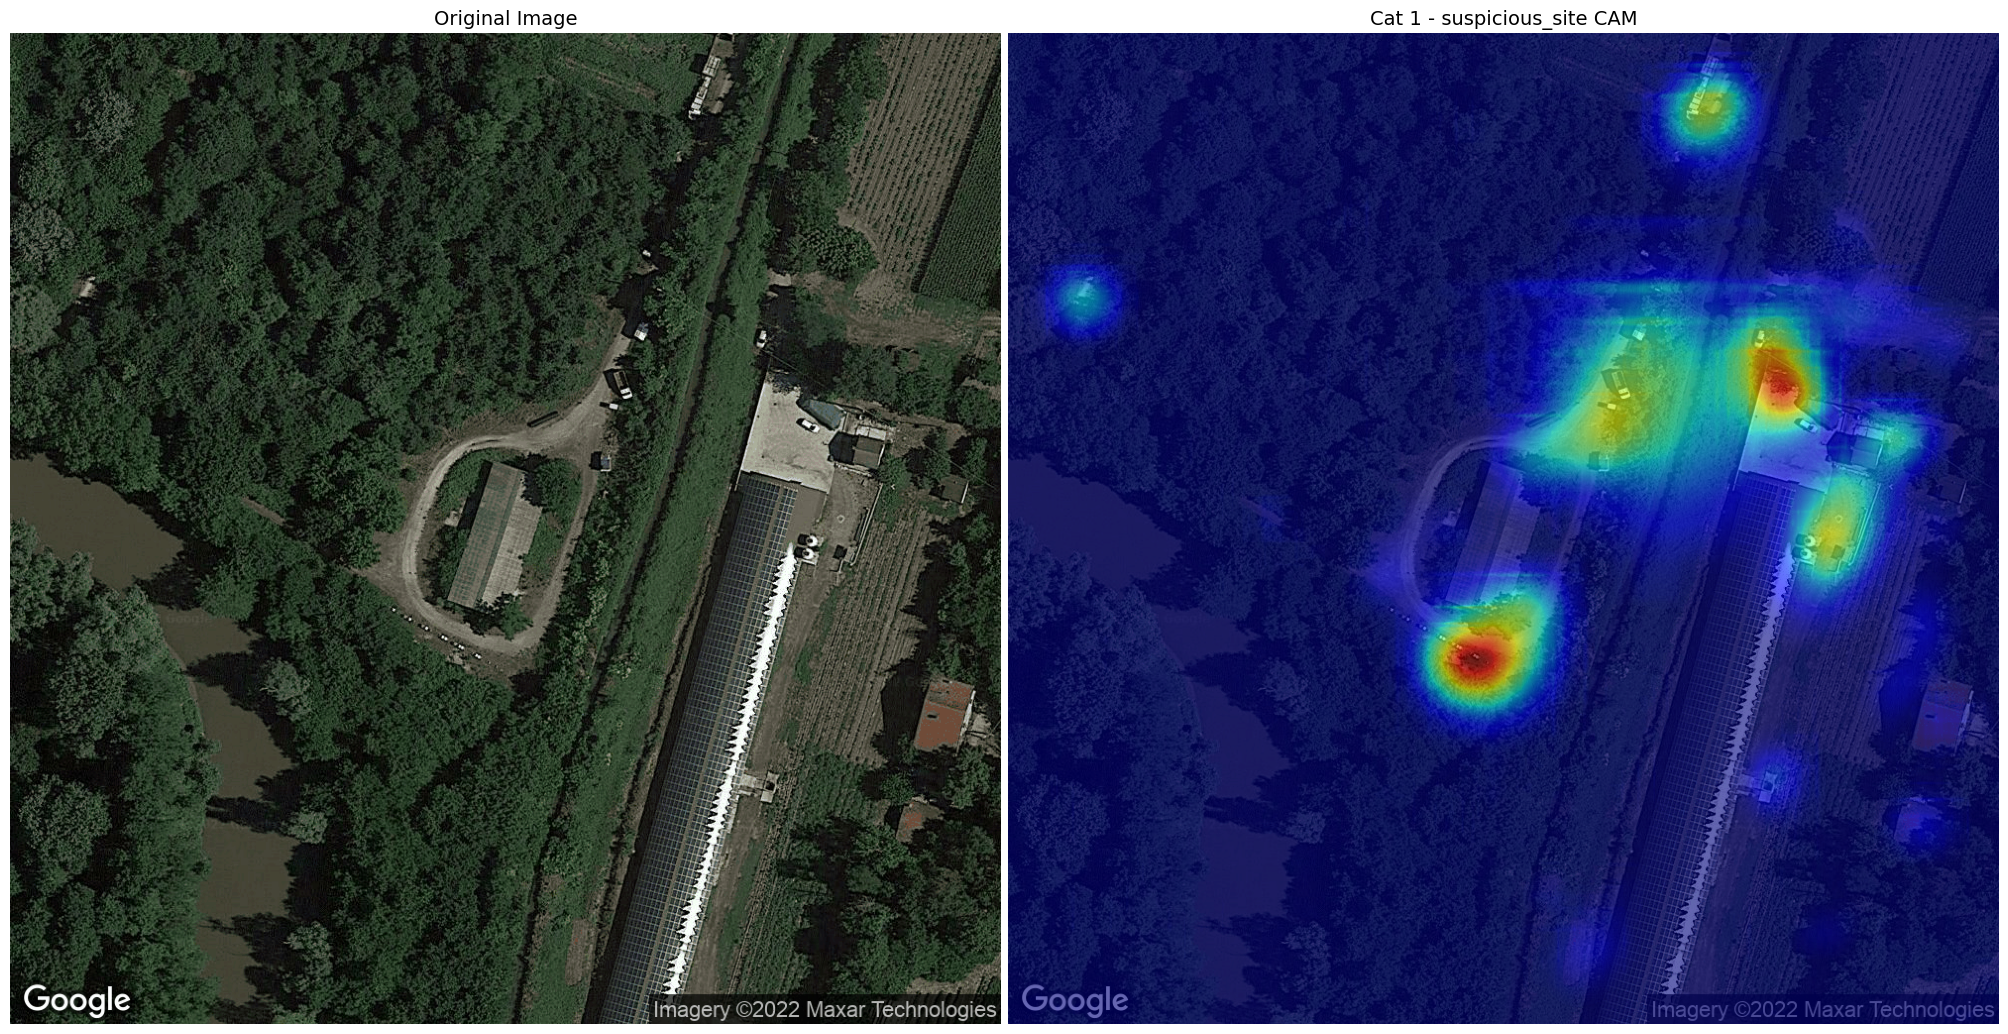

Saved image to: /kaggle/working/54_cam.png


In [16]:
# 🔹 **Process False Positives**
print("\nProcessing False Positives...\n")
for _, row in false_pos.iterrows():
    img_path = os.path.join(TEST_IMAGE_FOLDER, row["file_name"])
    print(f"Analyzing False Positive: {row['file_name']}...")
    print(f"Severity: {row['severity']}")
    print(f"Evidence: {row['evidence']}")
    print(f"Site type: {row['site_type']}")
    print(f"Categories: {row['categories']}")

    plt.ioff()
    
    # Execute classification analysis
    iw = ip.execute_cams_pred(img_path)

    # Manually trigger show_global_cams (which will plot the image)
    plt.figure()  # Create a new figure
    iw.show_global_cams()  # This displays the CAM visualization

    # Save the visualization manually
    save_path = os.path.join("/kaggle/working/", f"{row['image_id']}_cam.png")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()  # Close figure to free memory

    print(f"Saved image to: {save_path}")
    break

# # 🔹 **Process False Negatives**
# print("\nProcessing False Negatives...\n")
# for _, row in false_neg.iterrows():
#     img_path = os.path.join(TEST_IMAGE_FOLDER, row["file_name"])
#     print(f"Analyzing False Negative: {row['file_name']}...")
#     print(f"Severity: {row['severity']}")
#     print(f"Evidence: {row['evidence']}")
#     print(f"Site type: {row['site_type']}")
#     print(f"Categories: {row['categories']}")

#     # Execute classification analysis
#     iw = ip.execute_cams_pred(img_path)

#     # Manually trigger show_global_cams (which will plot the image)
#     plt.figure()  # Create a new figure
#     iw.show_global_cams()  # This displays the CAM visualization

#     # Save the visualization manually
#     save_path = os.path.join("/kaggle/working/", f"{row['image_id']}_cam.png")
#     plt.savefig(save_path, bbox_inches="tight")
#     plt.close()  # Close figure to free memory

#     print(f"Saved image to: {save_path}")
